# Classification

* matrice de confusion,precision, recall, f1-score
* accuracy score
* courbe roc, auc-score
* entropie croisé

## Precision, recall, F_mesure
En classification binaire, les termes positifs (P) et négatifs (N) font référance à la classe prédite d'une observation fournit par le classifier.<br>
En classification binaire, les termes true et false signifie que la classe predite coresponde à la vrais classe de l'observation.<br>
$$\begin{array}{lll}
      & Vrais classe P & Vrais classe N\\
classe predites P & TP (true positif) & FP (false positive)\\
classe predites N & FN (false negative) & TN (true negative)
      \end{array}$$
      
On définit alors la précision, le rappel (recall), et la F_mesure:<br>
   * precision = $\frac{TP}{TP+FP} $
   * recall = $\frac{TP}{TP+FN}$
   * $F_{\beta}=(1+\beta^{2})\frac{precision\times recall}{\beta^{2}precision+recall}$
   * $F_{1} = 2\frac{precision\times recall}{precision+recall}$ est le score F mesure

Dans les exemples qui suivent, y_true représente les vrais classes et y_pred représente les classes prédites.

In [20]:
y_true = np.array([0,1,0,0,1,1,1,1])
y_pred = np.array([0,1,1,0,0,1,0,1])

Ici on calcule la précision avec la precision_score:

In [24]:
from sklearn.metrics import precision_score

precision = precision_score(y_true,y_pred)
precision

0.75

Ici on calcule le rappel (recall) avec recall_score:

In [27]:
from sklearn.metrics import recall_score

recall = recall_score(y_true,y_pred)

Dans la cellule qui suit, on détermine le F-mesure dans le cas beta=2 avec fbeta_score:

In [30]:
from sklearn.metrics import fbeta_score

fbeta_score = fbeta_score(y_true,y_pred,beta=2)
fbeta_score

0.625

Enfin, on calcule la F_mesure avec f1_score:

In [33]:
from sklearn.metrics import f1_score

f1 = f1_score(y_true,y_pred)

## Matrice de confusion


Une matrice de confusion est tableau dont  chaque ligne représente le nombre d'occurrences d'une classe réelle et chaque colonne de la matrice représente le nombre d'occurrences d'une classe estimée. Le nombre d'occurences bien classées correspond à la somme de la diagonale principale de la matrice.

### Exemple

Ci-dessous nous allons calculer la matrice de confusion lié à une classification binaire. y_true représente les vrais classes alors que y_pred représente les classes prédites. On utilise la fonction confusion_matrix.

In [43]:
import numpy as np
y_true = np.array([0,0,1,1,0,1,0])
y_pred = np.array([0,1,0,1,0,1,1])

from sklearn.metrics import confusion_matrix

MAT_CONFUSION = confusion_matrix(y_true,y_pred)
MAT_CONFUSION

array([[2, 2],
       [1, 2]])

Le nombre d'observation de vrais classe 1 étant prédite en 1 est 2.

In [48]:
print("TP:"+ str(MAT_CONFUSION[0,0]))
print("FP:"+str(MAT_CONFUSION[1,0]))
print("FN:"+str(MAT_CONFUSION[0,1]))
print("TN:"+str(MAT_CONFUSION[1,1]))
print("BIEN CLASSES:"+str(np.diag(MAT_CONFUSION).sum()))

TP:2
FP:1
FN:2
TN:2
BIEN CLASSES:4


### Exemple matrice de confusion à 3 classes
Dans l'exemple ci-dessous on a 3 classes 0,1 et 2.

In [59]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

y_pred = np.array([2, 1, 0, 2, 0, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2, 0, 1, 1, 0, 0])
Y_true = np.array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0])

confusion_matrix(Y_true,y_pred)

array([[6, 0, 0],
       [0, 5, 5],
       [0, 0, 4]])

### Exemple matrice de confusion d'un SVM sur le dataset iris

Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]


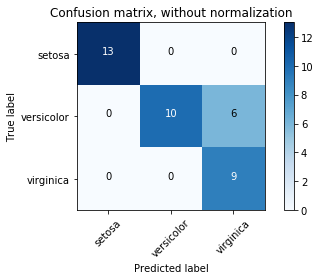

In [51]:
### Exemple 
print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      #title='Normalized confusion matrix')

plt.show()

## Courbe ROC, score AUC
* On définie le taux de vrais positif par : TPR = $\frac{TP}{TP+FN}$, 
* On définie le taux de faux positif par ; FPR = $\frac{FP}{FP+TN}$

Une courbe ROC (receiver operating characteristic) est un graphique représentant les performances d'un modèle de classification pour tous les seuils de classification. Cette courbe trace le taux de vrais positifs en fonction du taux de faux positifs.<br>
Le score AUC est l'aire sous la courbe ROC. Le score AUC est compris entre 0 et 1. Un algorithme dont le score AUC vaut 1 sera parfait.

### Exemple
Dans l'exemple suivant, y_true représente les vrais valeurs. L'algorithme utilisé renvois pour chaque observation, la probabilité qu'il appartienne à la classe 2. La classe 2 joue le role de la classe positive.

In [21]:
import numpy as np

y_true = np.array([1, 1, 2, 2,1,2,2])
scores = np.array([0.1, 0.4, 0.35, 0.8,0.3,0.5,0.25])

On utilise la fonctionnalité roc_curve pour déterminer le taux de vrais positif et le taux de faux positif:

In [22]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_true,scores,pos_label=2)

On affiche les résultats:

In [23]:
print("false positive rate :"+str(fpr))
print("true positive rate :"+str(tpr))
print("thresholds:"+str(thresholds))

false positive rate :[ 0.          0.          0.33333333  0.33333333  0.66666667  0.66666667
  1.        ]
true positive rate :[ 0.25  0.5   0.5   0.75  0.75  1.    1.  ]
thresholds:[ 0.8   0.5   0.4   0.35  0.3   0.25  0.1 ]


Quand le seuil se situe à 0.4, le fpr s'établit à 0.33 et le tpr vaut 0.5. On trace la courbe ROC:

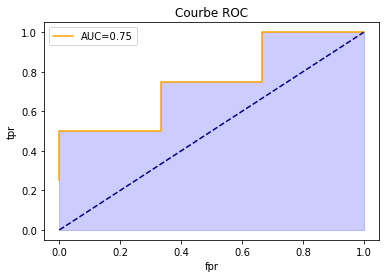

In [27]:
from sklearn.metrics import roc_auc_score, auc

import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr,tpr,color='orange',label='AUC='+str(auc(fpr,tpr)))
plt.fill_between(fpr,tpr,color='b',alpha=0.2)
plt.plot([0,1],[0,1],color='navy',linestyle='--')
plt.title("Courbe ROC")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend(loc="upper left")
plt.show()

Le score AUC correspond à l'aire sous le courbe orange.

On utilise les fpr tpr calculer avant et on utilise la fonction auc.

In [30]:
from sklearn.metrics import auc
score_auc = auc(fpr,tpr)
score_auc

0.75

On utilise la fonction roc_auc_score.

In [31]:
from sklearn.metrics import roc_auc_score
import numpy as np

y_true_bis = np.where(y_true==2,1,0)
score_auc_bis = roc_auc_score(y_true_bis,scores)
score_auc_bis

0.75

## Metrique log loss
$$log loss=\frac{-1}{N}\sum_{i=1}^{N}\sum_{j=1}^{M}y_{ij}\ln(p_{ij})$$
* N est le nombre d'observation, 
* $y_{ij}=1$ si l'observation i est de classe j, 0 sinon
* M est le nombre de classe
* $p_{ij}$ est la probabilité que l'observation i appartienne à la classe j

La métrique log loss prend en entré les vrais classes des observations ainsi que les probabilités prédites de chaques obsevations.

In [60]:
from sklearn.metrics import log_loss

y_true = [0, 0, 1, 1]
y_pred_prob = [[.9, .1], [.8, .2], [.3, .7], [.01, .99]]
log_loss(y_true, y_pred_prob) 
#-np.log(np.array([0.9,0.8,0.7,0.99])).sum()/4

0.17380733669106749

### Exemple log loss pour 3 classe

Dans y_pred_prob est une matrice dont chaque ligne représente un vecteur de probabilité.

In [88]:
import numpy as np

y_true = np.array([1, 2, 0, 1, 2, 2, 1, 1, 0, 2])
y_pred_prob = np.array([[  1.84461770e-01,   8.03423995e-01,   1.21142355e-02],\
                        [  3.42437100e-05,   2.29659668e-01,   7.70306088e-01],\
                        [  9.41826937e-01,   5.81729864e-02,   7.65478395e-08],\
                        [  7.10347371e-03,   9.58746873e-01,   3.41496532e-02],\
                        [  4.50387023e-04,   1.66787438e-01,   8.32762175e-01],\
                        [  4.47277007e-04,   5.16437710e-01,   4.83115013e-01],\
                        [  1.56700601e-02,   9.41278215e-01,   4.30517252e-02],\
                        [  4.86986912e-03,   6.59807897e-01,   3.35322234e-01],\
                        [  8.26003668e-01,   1.73996025e-01,   3.06895915e-07],\
                        [  3.81963886e-05,   2.99447731e-01,   7.00514073e-01]])

from sklearn.metrics import log_loss
log_loss(y_true,y_pred_prob)

0.2515829622812415

## Métrique de la précision
Soit un échantillon de n observations. On supose que $y_{i}$ est la vrais classe de l'observation i et que $\hat{y_{i}}$. Alors
$$accuracy=\frac{1}{n}\sum_{i=1}^{n}I(y_{i}=\hat{y_{i}}) $$

Dans l'exemple ci_dessous, nous montrons le calcule de la précision avec sklearn:

In [89]:
from sklearn.metrics import accuracy_score
y_true = np.array([1, 2, 0, 1, 2, 2, 1, 1, 0, 2])
y_pred = np.array([0, 2, 0, 1, 2, 0, 1, 1, 0, 1])
accuracy_score(y_true,y_pred)

0.69999999999999996

# Métrique de régression

## Le score de la variance expliqué

$\hat{y}$ est la valeur cible predite et $y$ est la vrais valeur cible. On suppose que l'échantillon est de taille n. Alors la variance expliqué est:
$$explened variance(y,\hat{y})=1-\frac{var(y-\hat{y})}{var(y} $$

Voici un exemple de calcule de la variance explique avec sklearn:

In [93]:
from sklearn.metrics import explained_variance_score
import numpy as np
y_true = np.array([3, -0.5, 2, 7])
y_pred = np.array([2.5, 0.0, 2, 8])
explained_variance_score(y_true,y_pred)

0.95717344753747324

## Le score de l'erreur absolue moyenne

On suppose $\hat{y_{i}}$ est la valeur prédite de l'observation i et que $y_{i}$ est la vrais valeur correspondante.
Alors 
$$ MAE=\frac{1}{n}\sum_{i=0}^{n-1}|y_{i}-\hat{y_{i}}| $$

Dans la cellule ci-dessous on cherche l'erreur absolue moyenne:

In [96]:
import numpy as np
from sklearn.metrics import mean_absolute_error
y_true = np.array([3, -0.5, 2, 7])
y_pred = np.array([2.5, 0.0, 2, 8])
mean_absolute_error(y_true, y_pred)

0.5

## Le score de l'erreure quadratique moyenne:

On suppose $\hat{y_{i}}$ est la valeur prédite de l'observation i et que $y_{i}$ est la vrais valeur correspondante.
Alors 
$$ MSE=\frac{1}{n}\sum_{i=0}^{n-1}(y_{i}-\hat{y_{i}})^{2} $$

Dans la cellule ci-dessous on cherche l'erreur quadratique moyenne:

In [97]:
import numpy as np
from sklearn.metrics import mean_squared_error
y_true = np.array([3, -0.5, 2, 7])
y_pred = np.array([2.5, 0.0, 2, 8])
mean_squared_error(y_true, y_pred)

0.375

## Le score $R^{2}$, coéfficient de détermination

La fonction r2_score calcule le coéficiant de détermination $R^{2}$. On suppose que $\hat{y_{i}}$ est la valeur prédite de l'observation i et $y_{i}$ sa vrais valeur correspondante. la taille de l'échantillon est n. Alors 
$$R^{2}=1-\frac{\sum_{i=0}^{n-1}(y_{i}-\hat{y_{i}})^{2}}{\sum_{i=0}^{n-1}(y_{i}-\overline{y})^{2}} $$
ou l'on a $\overline{y}=\frac{1}{n}\sum_{i=0}^{n-1}y_{i}$. Le meilleur score possible est 1.

Ici, on cherche le coéfificient $R^{2}$:

In [2]:
import numpy as np
from sklearn.metrics import r2_score
y_true = np.array([3, -0.5, 2, 7])
y_pred = np.array([2.5, 0.0, 2, 8])
r2_score(y_true, y_pred)  

0.94860813704496794

# Validation croisé, paramétrage optimale d'algorithme

## Principe de la validation croisé

Le but de la validation croisé est de validé les performances d'un algorithme. 
On découpe un échantillon en K partie. 
Ensuite on séléctionne un des K partie comme échantillon de validation et l'union des K-1 autres parties comme échantillon d'apprentissage. On répète cette opération K-fois et on obtient ainsi un jeux de K scores (métrique de performance) que l'on combine pour mesurer l'éfficacité de l'algorithme. La combinaison de ces K scores peut être vue comme un méta-score.

## Fonction GridSearchCV

Les algorithmes de machine learning sont parmétrables. Par exemple, lorsque l'on fait une régression logistic on peut choisire :
* une pénalité L1 ou L2 sur les coéficients
* une méthode d'optimisation : newton-cg, lbfgs, liblinear, sag, saga
* un parmétre de régularisation des coéficients C

L'ensemble des paramêtre précédants peuvent être stocké dans une grille modélisé par un dictionnaire python:

In [31]:
import numpy as np
param_grid = {'penalty':['l2'],'C':np.linspace(0.1,10,100),\
              'solver':['newton-cg', 'lbfgs', 'liblinear']}

La fonction GridsearchCV cherche le paramétrage optimale ayant le meilleur meta-score que produit une validation croisé. En effet la fonction GridsearchCV calcule le meta score de chaque combinaison de paramêtre de la grille param_grid. Ensuite, on peut incorporer ce paramétrage dans une régréssion logistique.

### Exemple d'utilisation de GridsearchCV pour la classification
Notre but est de trouver la meilleur régression logistique possible sur les donée iris. Il s'agit d'une classification à 3 classes.
On va utiliser la fonctionalité GridsearchCv avec une validation croisé en 5 parties (5 folds) dans le but de trouver la meilleur précision (accuracy_score). 

In [43]:
#on import les données iris

from sklearn.datasets import load_iris
iris = load_iris()

from sklearn.model_selection import train_test_split

#On divise en échantillon d'apprentissage et de test
#X_train, X_test, Y_train, Y_test = train_test_split(iris['data'],iris['target'], test_size=0.2,random_state=1998)

#logistique
from sklearn.linear_model import LogisticRegression
logit_clf = LogisticRegression()

#On fait la grille de paramêtre 

param_grid = {'penalty':['l2'],'C':np.linspace(0.1,10,100),\
              'solver':['newton-cg','lbfgs', 'liblinear']}

#On appelle la fonctionnalité GridsearchCv
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(estimator=logit_clf,param_grid=param_grid,scoring='accuracy',cv=5)

clf.fit(iris['data'],iris['target'])

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l2'], 'C': array([  0.1,   0.2, ...,   9.9,  10. ]), 'solver': ['newton-cg', 'lbfgs', 'liblinear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

On détermine ainsi les paramêtre permettant d'obtenir le meilleur méta-score:

In [44]:
clf.best_params_

{'C': 3.9000000000000004, 'penalty': 'l2', 'solver': 'liblinear'}

On peut obtenir le méta_score:

In [45]:
clf.best_score_

0.96666666666666667

### Exemple d'utilisation GridSearchCV pour la régression 
Nous disposons ici des donnée mpg (miles per galon).
1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

Le but ici c'et de prédire la variable mpg (mpg) en fonction des autres.
Dans cet exemple, on va parmétrer au mieux un arbre de régression pour prédire . On va jouer sur la profondeur maximal de l'arbre (max_depth), le nombre minimal d'observations pour diviser un neu interneThe minimum number of samples required to split an internal node(min_samples_split), The minimum number of samples required to be at a leaf node (min_samples_leaf). 

In [85]:
import pandas as pd
nom_var = ['mpg','cylinders','displacement','horsepower',\
           'weight','acceleration','model year','origin','car name']
MPG = pd.read_csv("/home/fabien/Bureau/mpg.txt", header=None,sep='\s+',names=nom_var)

MPG = MPG.loc[MPG['horsepower']!='?']

MPG = MPG.drop(['car name'],axis=1)
MPG['origin'] = MPG['origin'].astype(str)
MPG['cylinders'] = MPG['cylinders'].astype(str)

In [86]:
ADUM = pd.get_dummies(MPG[['origin','cylinders']])
MPG = MPG.drop(['origin','cylinders'],axis=1)
MGPBIS = pd.concat([MPG,ADUM],axis=1)

In [93]:
from sklearn.model_selection import train_test_split

Y = MGPBIS['mpg']
LISTV = list(MGPBIS)
LISTV = [o for o in LISTV if o!='mpg']
X = MGPBIS[LISTV] 


X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)

On va faire une validation croisé à 5 partie pour chaque combinaison de la grille de paramêre suivante {'max_depth':range(1,10),'min_samples_split':range(2,10),'min_samples_leaf':range(1,10)}. On utilise GridSearchCV.

In [97]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

param_grid = {'max_depth':range(1,10),'min_samples_split':range(2,10),'min_samples_leaf':range(1,10)}

from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(estimator=dt,param_grid=param_grid,cv=5,scoring='r2')

clf.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 10), 'min_samples_split': range(2, 10), 'min_samples_leaf': range(1, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=0)

On affiche le meilleur score r2:

In [102]:
clf.best_score_

0.81760448084742987

On affiche les meilleurs paramêtre:

In [103]:
clf.best_params_

{'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 8}

On calcule ensuite le score r2 sur l'ensemble de test:

In [104]:
from sklearn.metrics import r2_score
y_pred =  clf.predict(X_test)
r2_score(Y_test,y_pred)

0.84830248174764555

Cette fois, on cherche le meilleur modele pour la métrique de l'écart quadratique moyen (scoring='neg_mean_squared_error')

In [105]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

param_grid = {'max_depth':range(1,10),'min_samples_split':range(2,10),'min_samples_leaf':range(1,10)}

from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(estimator=dt,param_grid=param_grid,cv=5,scoring='neg_mean_squared_error')

clf.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 10), 'min_samples_split': range(2, 10), 'min_samples_leaf': range(1, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

On cherche le meilleur score:

In [106]:
clf.best_score_

-11.340291146312708

On calcule l'écart quadratique moyen que donne clf sur l'ensemble de test:

In [107]:
from sklearn.metrics import mean_squared_error

y_pred = clf.predict(X_test)
mean_squared_error(Y_test,y_pred)

7.877492459835941